In [1]:
import importlib
import local_utils; importlib.reload(local_utils)
from local_utils import *

train_df = pd.read_csv(DATA_DIR + '/train_v2.csv')
test_df = pd.read_csv(DATA_DIR + '/sample_submission_v2.csv')

label_map, inv_label_map, Y = process_labels(train_df)
print("Shape of Y {}".format(Y.shape))

train_inx, valid_inx = stratified_sampling(Y)
print("Train {}; Valid {};".format(len(train_inx), len(valid_inx)))

Using TensorFlow backend.


Import time: 10.314753293991089
Import time: 3.981590270996094e-05
Shape of Y (40479, 17)
Train 36431; Valid 4048;


In [2]:
train_df = pd.read_csv(DATA_DIR + '/train_v2.csv')
train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
train_count = []
valid_count = []
dist = []
#checking distribution for each class
for i in range(17):
    train_count.append(np.unique(Y[train_inx,i],return_counts=True)[1][1])
    dist.append(train_count[-1]/len(train_inx))
    valid_count.append(np.unique(Y[valid_inx,i],return_counts=True)[1][1])
    dist.append(valid_count[-1]/len(valid_inx))
dist_label = [x for pair in zip([x + '_trn' for x in (inv_label_map.values())],
                                [x + '_val' for x in (inv_label_map.values())]) for x in pair]

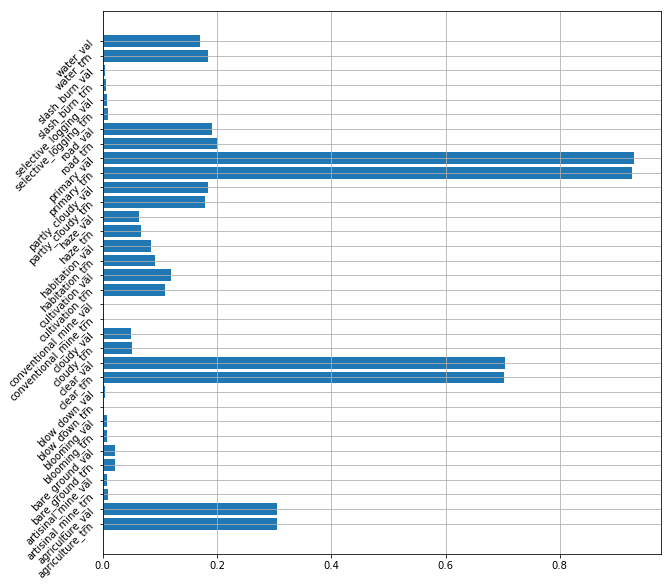

In [4]:
plot = plt.figure(figsize=(10,10))
plt.barh(np.arange(len(dist)),dist)
plt.yticks(np.arange(len(dist)),dist_label,rotation = 45)
plt.grid(True)
plt.show()

In [5]:
print(train_count[label_map['blow_down']])
print(valid_count[label_map['blow_down']])

84
14
